In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [ ]:
setwd('/home/cbios/github/swib_data_quality_analysis/EDMTechnicalTasks/application_analysis/week10')

In [58]:
g <- read_graph("cck11_dataset.gml", format=c("gml"))

In [59]:
summary(g)

IGRAPH 60db74a DNW- 767 1193 -- 
+ attr: id (v/n), name (v/c), Role (v/c), SocioTech (v/c), Gender
| (v/c), Domain (v/c), WorkType (v/c), Continent (v/c), weight (e/n)


In [60]:
# extract the dataframes with node and edge information
g_net.v.df <- as_data_frame(g, what='vertices')
g_net.e.df <- as_data_frame(g, what='edges')

In [61]:
# write the split network to csv
write.csv(g_net.v.df, file="cmooc_v.csv")
write.csv(g_net.e.df, file="cmooc_e.csv")

In [73]:
# also export to gexf for networkx analysis using python
graph_gexf <- igraph.to.gexf(g, position=NULL)

ERROR: Error in igraph.to.gexf(g, position = NULL): could not find function "igraph.to.gexf"


[1] 0.5022327

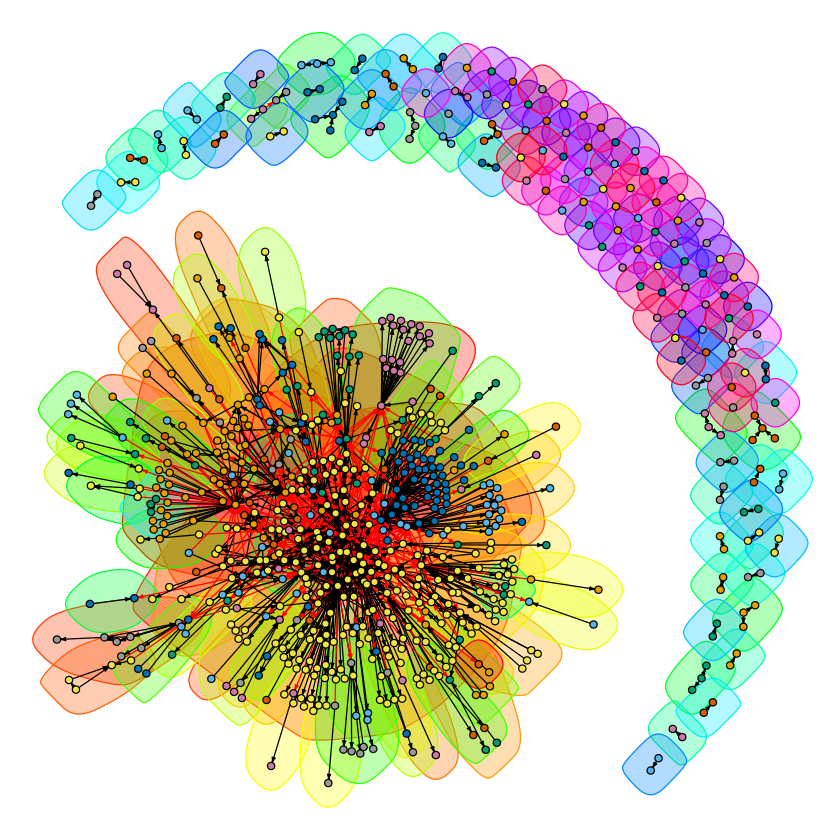

In [82]:
# take a look at the communities:
wc <- walktrap.community(g)
modularity(wc)
#wc <- fastgreedy.community(g)
#modularity(wc)
#wc <- edge.betweenness.community(g)
#modularity(wc)
#wc <- spinglass.community(g)
#modularity(wc)
#wc <- leading.eigenvector.community(g)
#modularity(wc)
#wc <- label.propagation.community(g)
#modularity(wc)

# Plot
par(mfrow=c(1,1), mar=rep(1,4))
layout <-layout.fruchterman.reingold(g)
plot(wc, g, layout=layout, vertex.label=NA, vertex.size=2,  edge.arrow.size=.2)



In [9]:
# we can see that the network has 1193 edges and 767 nodes further:
table(V(g)$Role)


Course Instructor           Student 
                3               764 

In [10]:
table(V(g)$Domain)


                        Business                        Community 
                              50                                3 
Elementary and primary education                 Entrepreneurship 
                              10                               62 
                      Government                           Health 
                               4                                9 
                Higher Education                        Languages 
                             190                               37 
                         Library                     Organization 
                               6                               68 
                           Other              Secondary education 
                               9                               78 
                   Undergraduate                          Unknown 
                               4                              216 
                         Various 
                           

In [11]:
table(V(g)$Continent)


          Africa             Asia Australia and NZ           Europe 
               2               19               48              191 
   International    North America    South America          Unknown 
               2              232               56              217 

In [12]:
table(V(g)$Gender)


      F       M     Org Unknown 
    237     285     100     145 

In [13]:
table(V(g)$WorkType)


   Mixed    Other Practice Research  Unknown 
      66        2      400      107      192 

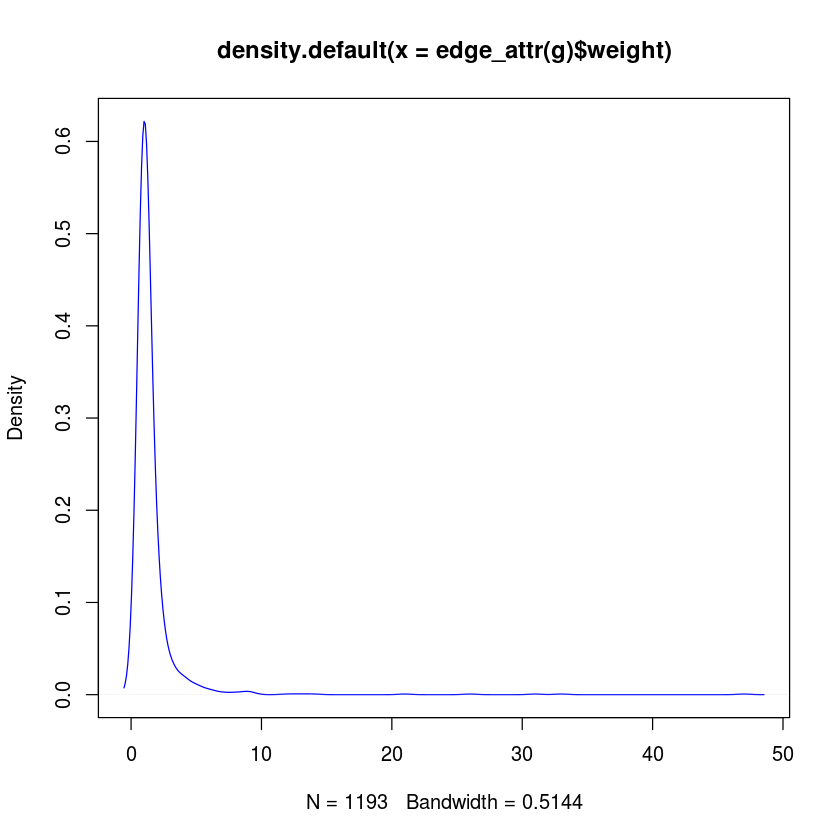

In [14]:
plot(density(edge_attr(g)$weight), col='blue')

In [15]:
summary(E(g)$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.548   1.000  47.000 

In [16]:
degree_distribution <- degree(g, mode="all")

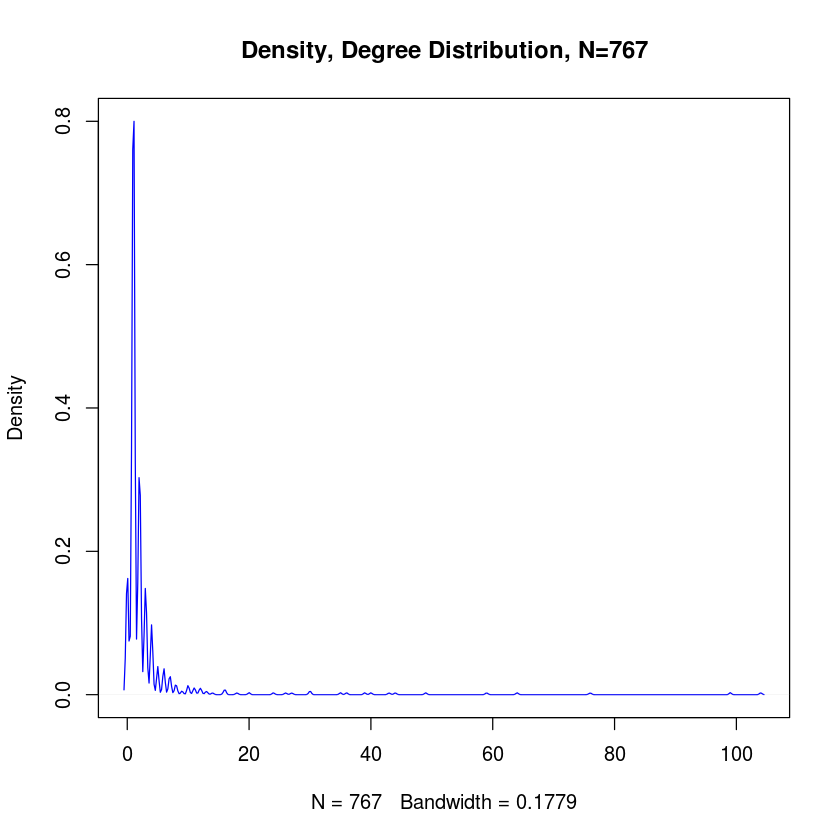

In [83]:
plot(density(degree_distribution), main='Density, Degree Distribution, N=767',col='blue')

In [18]:
# for ERGM we need 
library(intergraph); library(statnet); library(network)

Loading required package: tergm
Loading required package: statnet.common

Attaching package: ‘statnet.common’

The following object is masked from ‘package:base’:

    order

Loading required package: ergm
Loading required package: network
network: Classes for Relational Data
Version 1.13.0 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.


Attaching package: ‘network’

The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.ed

In [19]:
# ergm needs iGraph, convert
net <- asNetwork(g)

In [20]:
net

 Network attributes:
  vertices = 767 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 1193 
    missing edges= 0 
    non-missing edges= 1193 

 Vertex attribute names: 
    Continent Domain Gender id Role SocioTech vertex.names WorkType 

 Edge attribute names not shown 

In [52]:
list.vertex.attributes(net)

[1] "Continent"    "Domain"       "Gender"       "id"           "na"          
[6] "Role"         "SocioTech"    "vertex.names" "WorkType"

In [53]:
mixingmatrix(net, "SocioTech")

           To
From        Social Technical Unknown Total
  Social      1078         2      49  1129
  Technical      0         0       0     0
  Unknown       21         0      43    64
  Total       1099         2      92  1193

In [56]:
mixingmatrix(net, "WorkType")

          To
From       Mixed Other Practice Research Unknown Total
  Mixed       51     0       60       21      11   143
  Other        1     0        1        0       2     4
  Practice   137     0      471       80      98   786
  Research    43     0       45       30      15   133
  Unknown     17     0       50        4      56   127
  Total      249     0      627      135     182  1193

In [21]:
# next explore the mixing matrix of the network
mixingmatrix(net, 'Role')

                   To
From                Course Instructor Student Total
  Course Instructor                 1       9    10
  Student                          98    1085  1183
  Total                            99    1094  1193

In [23]:
mixingmatrix(net, "Gender")

         To
From        F   M Org Unknown Total
  F       143 244  67      30   484
  M       149 240  59      31   479
  Org      47  69  20      20   156
  Unknown   9  17   3      45    74
  Total   348 570 149     126  1193

In [24]:
mixingmatrix(net, "Domain")

                                  To
From                               Business Community
  Business                                4         0
  Community                               5         0
  Elementary and primary education        1         0
  Entrepreneurship                        9         1
  Government                              0         0
  Health                                  2         0
  Higher Education                       11         1
  Languages                               4         1
  Library                                 0         0
  Organization                            7         1
  Other                                   0         0
  Secondary education                     3         0
  Undergraduate                           0         0
  Unknown                                 5         0
  Various                                 1         0
  Total                                  52         4
                                  To
From    

In [25]:
mixingmatrix(net, "Continent")

                  To
From               Africa Asia Australia and NZ Europe International
  Africa                0    1                0      1             0
  Asia                  0    3                2      3             0
  Australia and NZ      1    3               17     52             1
  Europe                2   13               20     99             3
  International         0    0                0      0             0
  North America         1    6               13     51             3
  South America         0    2                0     20             0
  Unknown               0    3               14     50             3
  Total                 4   31               66    276            10
                  To
From               North America South America Unknown Total
  Africa                       0             0       0     2
  Asia                         4             1      11    24
  Australia and NZ            46            11      26   157
  Europe                

In [27]:
# use ergm counts for elected structural features
summary(net ~ edges + mutual + triangles + simmelianties + intransitive + transitive + cyclicalties + twopath)

edges        mutual      triangle simmelianties  intransitive 
         1193            55          1020            18          7415 
   transitive  cyclicalties       twopath 
          964           108          8379

In [30]:
# Next, find nodefactor, nodematch, condecov, dyadcov, and nodemix
summary(net ~ nodefactor("Continent") + nodematch("Continent", diff=T) + nodemix("Continent"))

nodefactor.Continent.Asia 
                                             55 
          nodefactor.Continent.Australia and NZ 
                                            223 
                    nodefactor.Continent.Europe 
                                            619 
             nodefactor.Continent.International 
                                             11 
             nodefactor.Continent.North America 
                                            714 
             nodefactor.Continent.South America 
                                            200 
                   nodefactor.Continent.Unknown 
                                            558 
                     nodematch.Continent.Africa 
                                              0 
                       nodematch.Continent.Asia 
                                              3 
           nodematch.Continent.Australia and NZ 
                                             17 
                     nodematch.Continent.Europe 
                                             99 
              nodematch.Continent.International 
                                              0 
              nodematch.Continent.North America 
                                            141 
              nodematch.Continent.South America 
                                             34 
                    nodematch.Continent.Unknown 
                                             90 
                    mix.Continent.Africa.Africa 
                                              0 
                      mix.Continent.Asia.Africa 
                                              0 
          mix.Continent.Australia and NZ.Africa 
                                              1 
                    mix.Continent.Europe.Africa 
                                              2 
             mix.Continent.International.Africa 
                                              0 
             mix.Continent.North America.Africa 
                                              1 
             mix.Continent.South America.Africa 
                                              0 
                   mix.Continent.Unknown.Africa 
                                              0 
                      mix.Continent.Africa.Asia 
                                              1 
                        mix.Continent.Asia.Asia 
                                              3 
            mix.Continent.Australia and NZ.Asia 
                                              3 
                      mix.Continent.Europe.Asia 
                                             13 
               mix.Continent.International.Asia 
                                              0 
               mix.Continent.North America.Asia 
                                              6 
               mix.Continent.South America.Asia 
                                              2 
                     mix.Continent.Unknown.Asia 
                                              3 
          mix.Continent.Africa.Australia and NZ 
                                              0 
            mix.Continent.Asia.Australia and NZ 
                                              2 
mix.Continent.Australia and NZ.Australia and NZ 
                                             17 
          mix.Continent.Europe.Australia and NZ 
                                             20 
   mix.Continent.International.Australia and NZ 
                                              0 
   mix.Continent.North America.Australia and NZ 
                                             13 
   mix.Continent.South America.Australia and NZ 
                                              0 
         mix.Continent.Unknown.Australia and NZ 
                                             14 
                    mix.Continent.Africa.Europe 
                                              1 
                      mix.Continent.Asia.Europe 
                                              3 
    

In [105]:
## part III, modeling 
null_model <- ergm(net ~ edges)

Evaluating log-likelihood at the estimate. 


In [106]:
summary(null_model)


Summary of model fit

Formula:   net ~ edges

Iterations:  8 out of 20 

Monte Carlo MLE Results:
      Estimate Std. Error MCMC % p-value    
edges -6.19741    0.02898      0  <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 814478  on 587522  degrees of freedom
 Residual Deviance:  17175  on 587521  degrees of freedom
 
AIC: 17177    BIC: 17189    (Smaller is better.) 

In [107]:
# find the z density
gden(net)

[1] 0.002030562

In [63]:
# find the probability of an additional edge
plogis(coef(null_model)['edges'])

edges 
0.002030562

In [108]:
# ^^ not very good model, lets add more attributes, specifically structural elements for degree nad reciprocity
model_v1 <- ergm(net ~ edges + mutual + idegree(1) + odegree(1))

In [35]:
summary(model_v1)


Summary of model fit

Formula:   net ~ edges + mutual + idegree(1) + odegree(1)

Iterations:  2 out of 20 

Monte Carlo MLE Results:
         Estimate Std. Error MCMC % p-value    
edges    -6.31164    0.03340      0 < 1e-04 ***
mutual    4.00271    0.14179      1 < 1e-04 ***
idegree1  0.04523    0.08071      0 0.57521    
odegree1 -0.23137    0.08277      0 0.00519 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 814478  on 587522  degrees of freedom
 Residual Deviance:  16858  on 587518  degrees of freedom
 
AIC: 16866    BIC: 16911    (Smaller is better.) 

In [111]:
model_v2 <- ergm(net ~ edges + mutual + gwidegree(0.6, fixed=T))  # control for degree and closure

Starting maximum likelihood estimation via MCMLE:
Iteration 1 of at most 20:
Optimizing with step length 0.275094667987521.
The log-likelihood improved by 5.573.
Iteration 2 of at most 20:
Optimizing with step length 0.199538522721466.
The log-likelihood improved by 4.306.
Iteration 3 of at most 20:
Optimizing with step length 0.270130058702059.
The log-likelihood improved by 2.316.
Iteration 4 of at most 20:
Optimizing with step length 0.320381347538764.
The log-likelihood improved by 3.113.
Iteration 5 of at most 20:
Optimizing with step length 0.814941411193905.
The log-likelihood improved by 3.476.
Iteration 6 of at most 20:
Optimizing with step length 1.
The log-likelihood improved by 0.3773.
Step length converged once. Increasing MCMC sample size.
Iteration 7 of at most 20:
Optimizing with step length 1.
The log-likelihood improved by 0.2036.
Step length converged twice. Stopping.
Evaluating log-likelihood at the estimate. Using 20 bridges: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 

In [112]:
summary(model_v2)


Summary of model fit

Formula:   net ~ edges + mutual + gwidegree(0.6, fixed = T)

Iterations:  7 out of 20 

Monte Carlo MLE Results:
          Estimate Std. Error MCMC % p-value    
edges     -5.16442    0.03377      0  <1e-04 ***
mutual     4.04740    0.16913      1  <1e-04 ***
gwidegree -3.07472    0.09431      0  <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 814478  on 587522  degrees of freedom
 Residual Deviance:  15954  on 587519  degrees of freedom
 
AIC: 15960    BIC: 15994    (Smaller is better.) 

In [1]:
#^^ not much improvement via structural components, lets look at attributes

model_v3 <- ergm( net ~ edges + mutual + gwidegree(0.6, fixed=T) + nodematch("Gender", diff=T) + nodefactor("Domain") )

In [122]:
summary(model_v3)


Summary of model fit

Formula:   net ~ edges + mutual + gwidegree(0.6, fixed = T) + nodematch("Gender", 
    diff = T) + nodefactor("Domain")

Iterations:  16 out of 20 

Monte Carlo MLE Results:
                                                   Estimate Std. Error MCMC %
edges                                              -5.54253    0.12950      0
mutual                                              3.71491    0.16767      1
gwidegree                                          -2.75169    0.09909      0
nodematch.Gender.F                                  0.17227    0.08619      0
nodematch.Gender.M                                  0.19783    0.07221      0
nodematch.Gender.Org                               -0.26117    0.23549      0
nodematch.Gender.Unknown                            1.58809    0.18826      0
nodefactor.Domain.Community                         1.25815    0.15294      0
nodefactor.Domain.Elementary and primary education -0.14047    0.20760      0
nodefactor.Domain.Entre

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                                                         Mean     SD Naive SE
edges                                               19.266846 68.417  1.06901
mutual                                               4.069824  8.574  0.13397
gwidegree                                            7.252364 21.571  0.33705
nodematch.Gender.F                                  -3.675781 16.091  0.25142
nodematch.Gender.M                                  15.806885 23.821  0.37221
nodematch.Gender.Org                                -0.817871  5.196  0.08119
nodematch.Gender.Unknown                             0.860596  8.484  0.13257
nodefactor.Domain.Community                         -3.378418  7.961  0.12439
nodefactor.Domain.Elementary and primary education   0.063232  5.14

Warning message in formals(fun):
“argument is not a function”

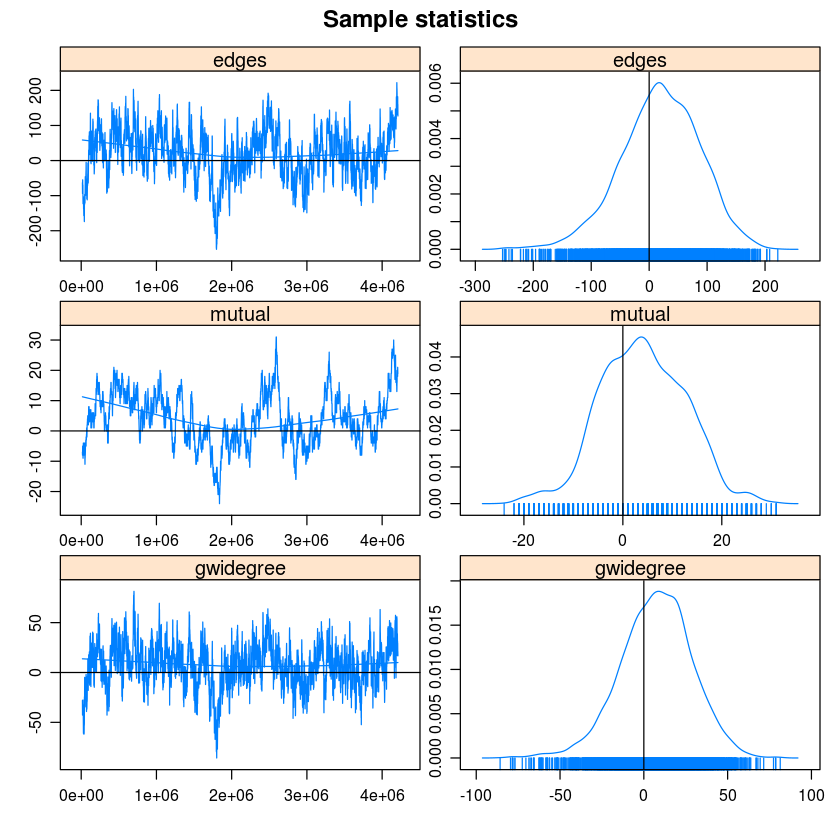

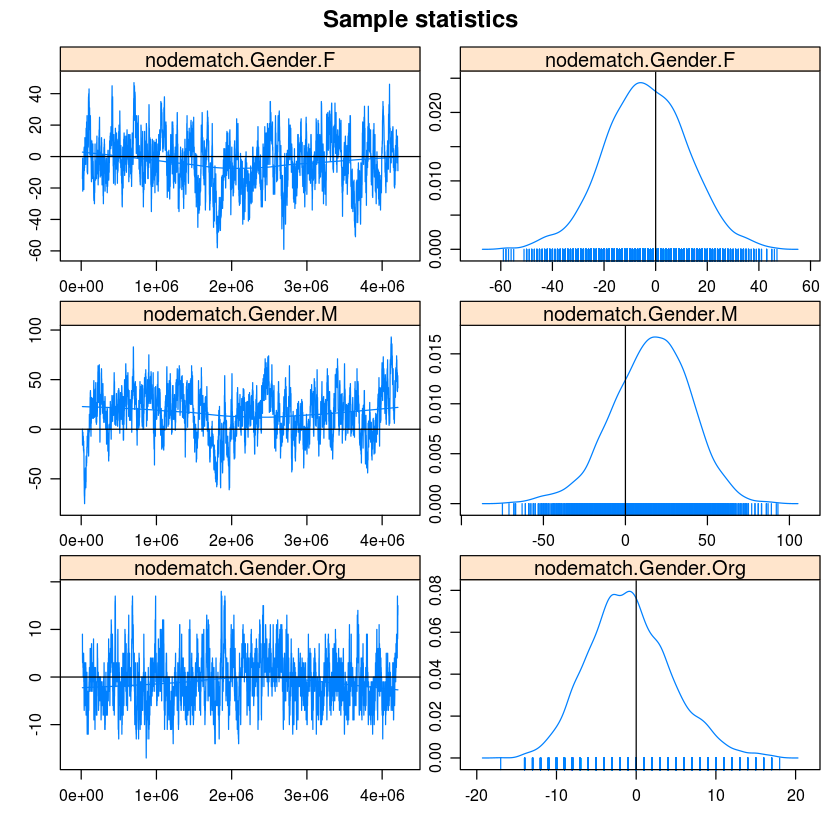

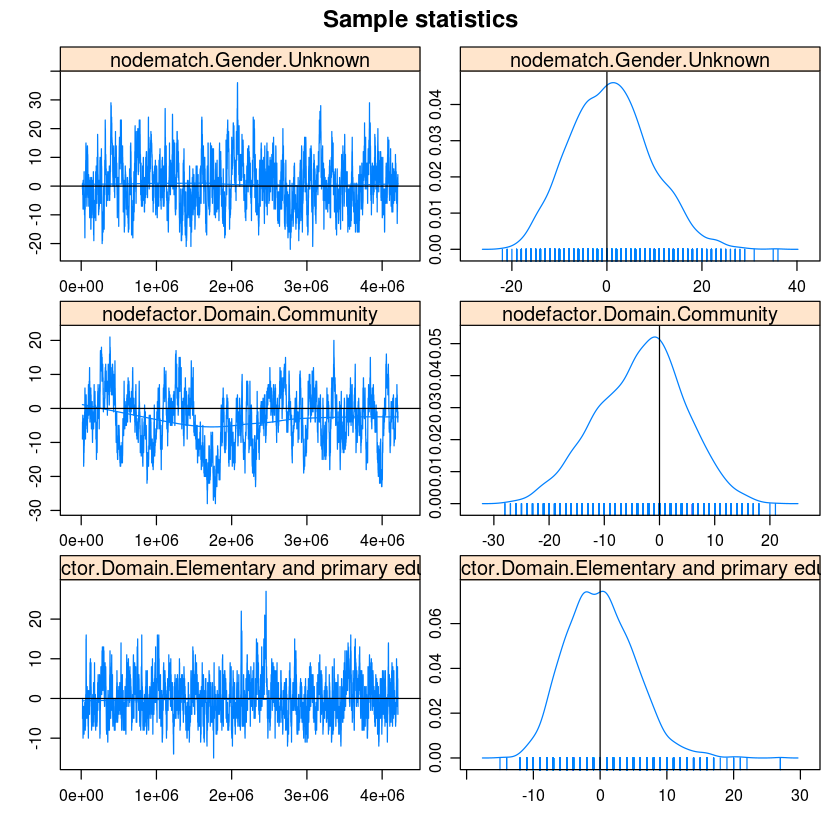

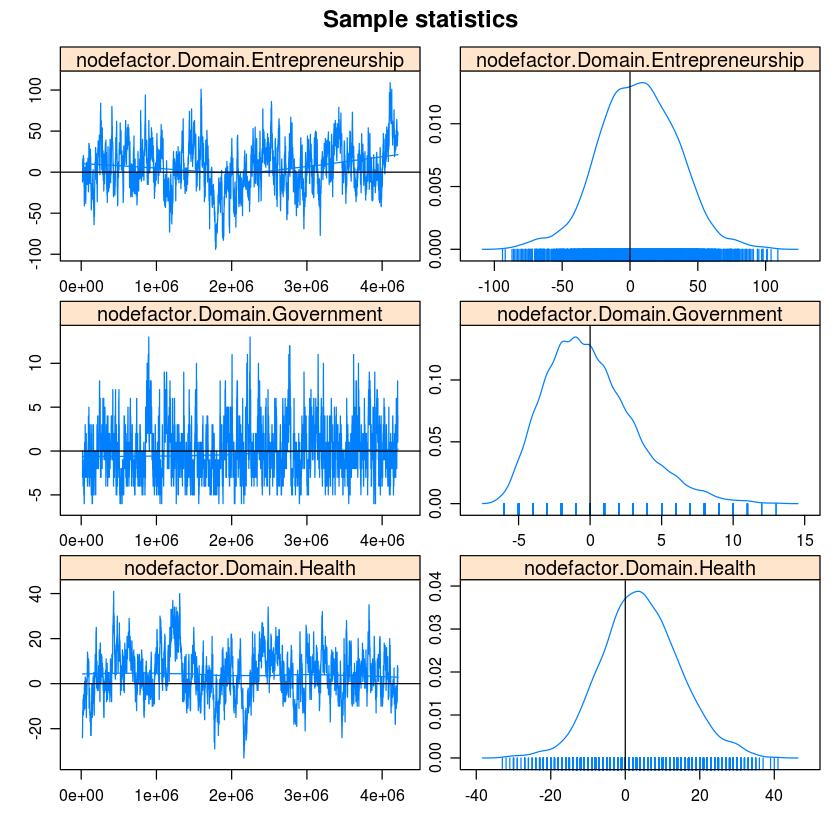

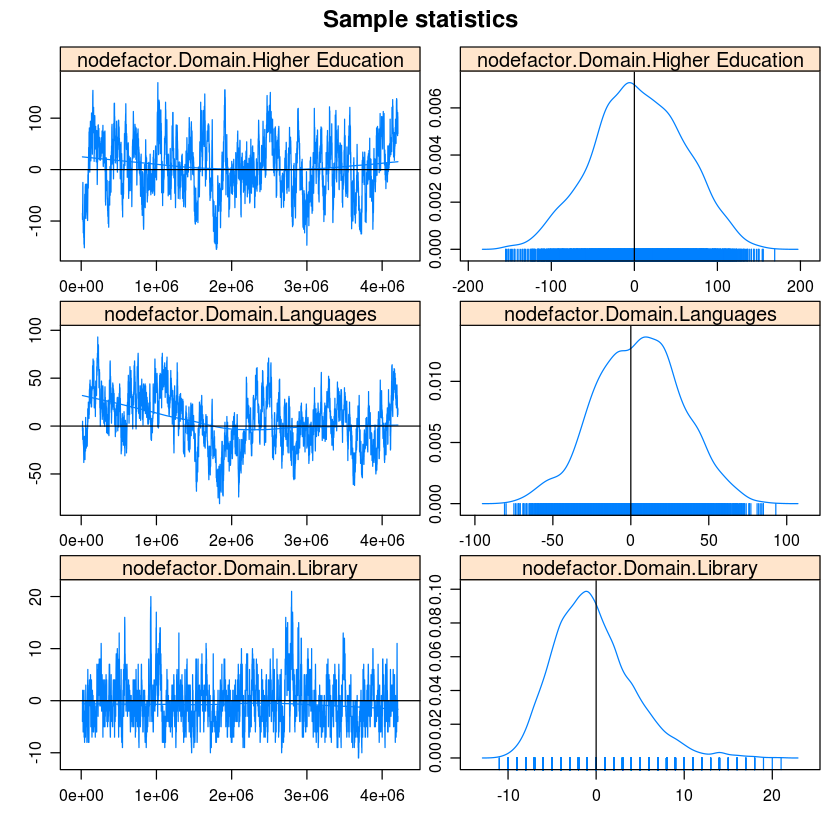

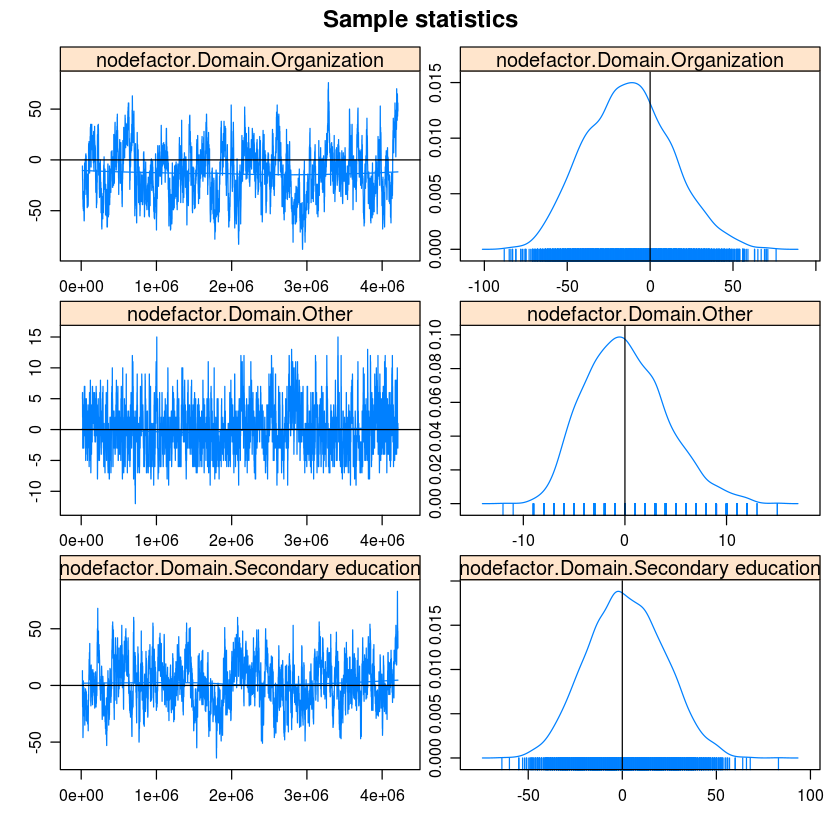


MCMC diagnostics shown here are from the last round of simulation, prior to computation of final parameter estimates. Because the final estimates are refinements of those used for this simulation run, these diagnostics may understate model performance. To directly assess the performance of the final model on in-model statistics, please use the GOF command: gof(ergmFitObject, GOF=~model).


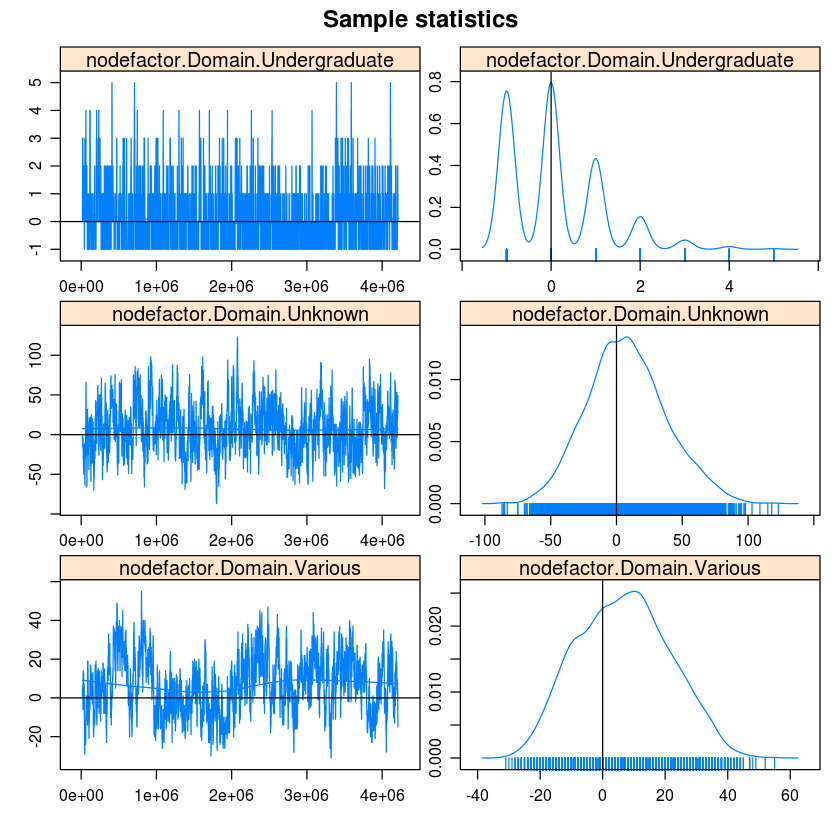

In [123]:
mcmc.diagnostics(model_v3)

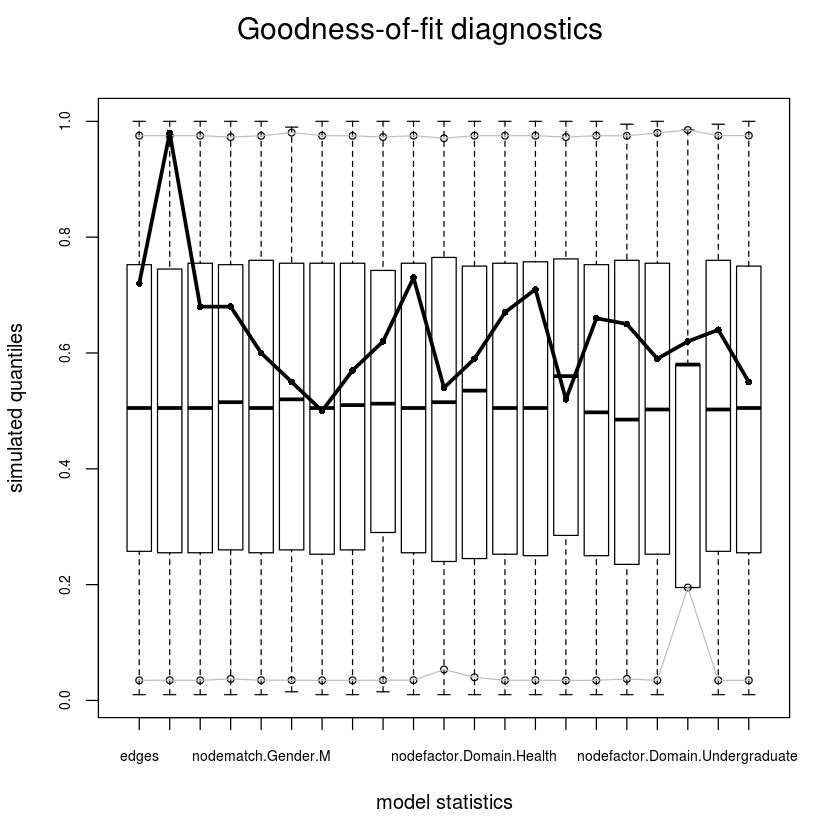

In [124]:
# generate compare plot for goodness of fit
mgof <- gof(model_v3, GOF=~model)
plot(mgof)

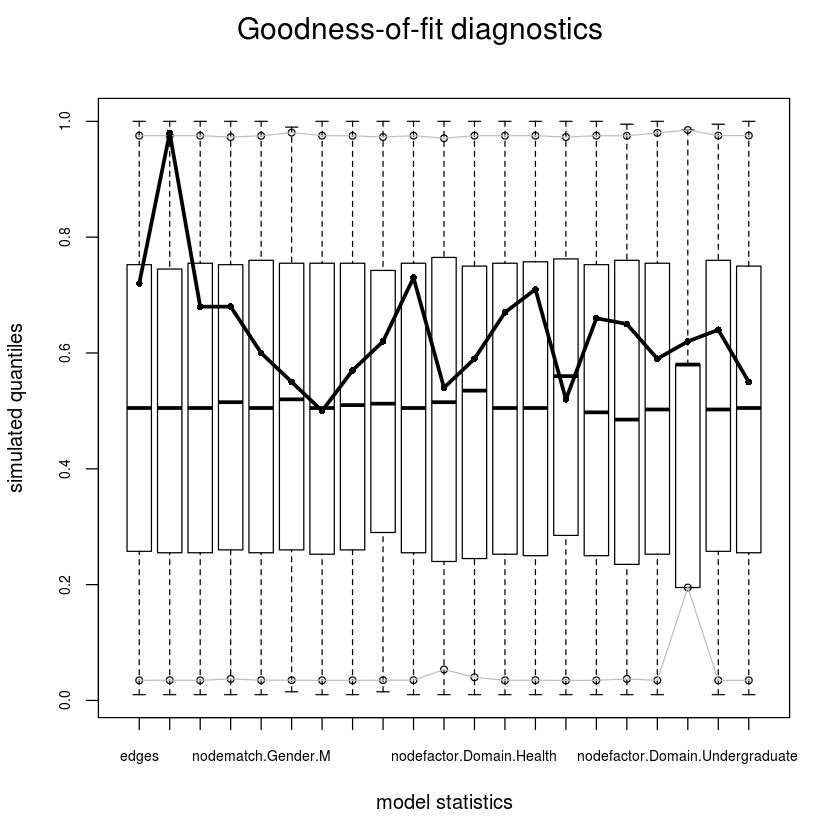

In [125]:
# look at degree
mgof.degree <- gof(model_v3, GOF=~idegree)
plot(mgof)

In [127]:
# check the odds of the data
lapply(model_v3[1], exp)

$coef
                                             edges 
                                       0.003916618 
                                            mutual 
                                      41.054737232 
                                         gwidegree 
                                       0.063819728 
                                nodematch.Gender.F 
                                       1.187996749 
                                nodematch.Gender.M 
                                       1.218752518 
                              nodematch.Gender.Org 
                                       0.770151522 
                          nodematch.Gender.Unknown 
                                       4.894379852 
                       nodefactor.Domain.Community 
                                       3.518906371 
nodefactor.Domain.Elementary and primary education 
                                       0.868945448 
                nodefactor.Domain.Entrepreneurship 
                                       1.407506480 
                      nodefactor.Domain.Government 
                                       0.766535273 
                          nodefactor.Domain.Health 
                                       1.458765452 
                nodefactor.Domain.Higher Education 
                                       1.268081147 
                       nodefactor.Domain.Languages 
                                       1.465836072 
                         nodefactor.Domain.Library 
                                       0.896620272 
                    nodefactor.Domain.Organization 
                                       1.382715303 
                           nodefactor.Domain.Other 
                                       0.720486812 
             nodefactor.Domain.Secondary education 
                                       0.985729683 
                   nodefactor.Domain.Undergraduate 
                                       0.160901322 
                         nodefactor.Domain.Unknown 
                                       0.670788003 
                         nodefactor.Domain.Various 
                                       1.251075291

In [70]:
install.packages("latticeExtra")

Installing package into ‘/home/cbios/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [71]:
library(latticeExtra)

Loading required package: lattice
Loading required package: RColorBrewer


Installing package into ‘/home/cbios/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Warning message:
“package ‘rgefx’ is not available (for R version 3.4.3)”